# Machine Learning Knowledge Final Assessment
So far we have covered the fundamentals of machine learning as well as some of the most popular and widely used algorithms in the area. Similarly to the machine learning knowledge midterm, this notebook will assess your understanding and knowledge about the topics we covered in the class as well as your proficiency in writing code to solve problems in machine learning.

Remember, you should read and run cells from the top to the bottom to ensure you do not get any errors because of missing imports or missing variables.

## Prologue: The Machine Learning Midterm
If you have not completed the machine learning midterm, please consider taking some time to do it as it will be beneficial for you as a reference for the future as well as allow us to give you more feedback on the machine learning part of the course before we move forward to deep learning.

In the midterm we cover the following topics:
* Machine Learning Fundamentals
* Model Evaluation
* K-Nearest Neighbors
* The Naive Bayes Classifier
* Decision Trees and Regression Trees

You can access the machine learning midterm [by clicking this link.](https://colab.research.google.com/drive/1YxPcBXHai9uZYUPZd9FAHY2_pFUBiOE3?usp=sharing)

## Part 1: The Intrusion Detection System Challenge
An **intrusion detection system** (IDS) is commonly used to monitor network traffic for suspicious activity and to alert when such activity is discovered. Your task is to take your knowledge of machine learning and programming to create a model that is able to detect the following type of intrusions:
* DoS attacks using slowloris
* DoS attacks using Slowhttptest
* DoS attacks using Hulk
* DoS attacks using GoldenEye
* DDoS attacks using LOIT
* Web password brute force attacks
* Web XSS attacks
* Botnet ARES attacks
* PortScan attacks
* Password brute forcing attacks with SSH-Patator and FTP-Patator

Your task is to create a model using any techniques we have taught you so far to achieve the highest **Balanced Accuracy Score (BAS)** for all attacks. **BAS**  can be computed with [this function from sk-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score). We are using this metric because we have an imbalanced dataset and this metric avoids inflated performance estimates on imbalanced datasets. It is defined as the macro-average of recall scores per class.

**This is a class competition, so we are asking all of you to please attempt this so we can have a more engaging competition.**

In your solution, please make sure to write down the time it takes your best model to train, and the time it takes to evaluate the testing set. You can time code in Python automatically in two different ways:

1. If the code you want to time is a single line, you can prepend **%time** before your code and it will time that single line. In the following cell I provide an example (for this challenge we care about **Wall Time**)

In [ ]:
import numpy as np
%time max(sorted(np.random.rand(1000000)))

CPU times: user 1.16 s, sys: 27.9 ms, total: 1.19 s
Wall time: 1.18 s


0.9999990740075626

2. If the code you want to time has multiple lines, use the following template to time it:

In [ ]:
from timeit import default_timer as timer
import numpy as np

# Start a timer
start_time = timer()

# CODE THAT YOU WANT TO TIME GOES BETWEEN THE TWO TIMER CALLS
# FOR EXAMPLE:
for i in range(15):
  max(sorted(np.random.rand(100000)))

# End the timer
end_time = timer()
# Print the duration in seconds, with 4 decimal places 
print(f"Code took {end_time-start_time:.4f} seconds")

Code took 1.0896 seconds


### Preparing The Challenge Dataset
The dataset consists of network traffic activity that has been labeled as either benign or as one type of attack. Each example contains features extracted from the network packet as well as features extracted using a network analysis tool. There are 78 features total per example.

**Please run this cell first before proceeding so the dataset can be loaded smoothly**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

csv_files = ['Tuesday-BruteForce.csv', 'Wednesday-DDoS.csv', 'Thursday-WebAttacks.csv', 'Friday-PortScan.csv', 'Friday-DDoS.csv', 'Friday-BotNet.csv']

def auto_label(rects, percentages=None):
    # Attach a text label above each bar displaying its height
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        percent = percentages[idx] if percentages else 0.5
        plt.text(rect.get_x() + rect.get_width()/2., percent*height, f'{int(height):,}', ha='center', va='bottom')

def load_ids_dataframe(data_dir):
  # Create a frame where we can store all the data
  df = pd.DataFrame()

  # Load each csv file individually, then combine them all into one dataframe
  for idx, csv_filename in enumerate(csv_files):
    print("Loading", csv_filename)
    temp_df = pd.read_csv(os.path.join(data_dir, csv_filename), skipinitialspace=True)
    # We don't need so many benign examples, just take the ones from Wednesday-DDoS
    if idx != 1:
      temp_df = temp_df.drop(temp_df[temp_df['Label'] == 'BENIGN'].index)
    
    df = pd.concat([df, temp_df])

  # Rename some labels
  df = df.replace(['Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS'], ['Web Pwd Brute Force', 'SQL Injection', 'XSS Attack'])
  df = df.replace(['DDoS'], 'DDoS LOIT')
  df = df.replace(['Bot'], 'Botnet ARES')

  # Drop these attacks as the number of samples is too small
  df = df.drop(df[df['Label']=='SQL Injection'].index)
  df = df.drop(df[df['Label']=='Heartbleed'].index)

  # This will remove all rows with np.inf and np.nan
  # First we will convert all infinities to NaN, then we drop all NaNs
  df = df.replace([np.inf, -np.inf], np.nan).dropna()

  return df

def load_ids_dataset(df):
  # Encode the labels as integers
  df_labels = df.pop('Label')
  label_encoder = LabelEncoder()
  df_labels = label_encoder.fit_transform(df_labels)

  # Prepare data for splitting
  x_features = df.values
  y_labels = np.array(df_labels).T

  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, train_size=0.5, random_state=17385, shuffle=True)

  return x_train, y_train, x_test, y_test, label_encoder

**If you are running code locally in your computer, follow these instructions  and run the following cell to load the dataset**
1. Go to [this Google Drive folder](https://drive.google.com/drive/folders/1AN3mJViLj0C6nxrF5ZtcFVy0nETCbaj4?usp=sharing) and download the following files:
* 'Tuesday-BruteForce.csv'
* 'Wednesday-DDoS.csv'
* 'Thursday-WebAttacks.csv'
* 'Friday-PortScan.csv'
* 'Friday-DDoS.csv'
* 'Friday-BotNet.csv'

2. Modify **data_dir** below to be the directory in your computer where you have the CSV files and run the following cell:

In [ ]:
data_dir = ''

**If you are running code using Colab, follow these instructions and run the following cells to load the dataset**

In [ ]:
##### RUN THIS CELL ONLY IF YOU ARE USING GOOGLE COLAB!
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Datasets/ids2017/'

Mounted at /content/drive


### Loading the dataset to your notebook (both local and Colab)
**Now that you have set-up your notebook either locally or in Colab, run the following cell to load or re-load the dataset**

In [ ]:
# Load the dataframe
df = load_ids_dataframe(data_dir)
df_copy = df.copy()

# Combine some labels into one
#df = df.replace(['DDoS LOIT', 'DoS GoldenEye'], 'DDoS')

# Convert to arrays for machine learning models
x_train, y_train, x_test, y_test, label_encoder = load_ids_dataset(df)

# Some sk-learn methods take these as parameters, use them!
class_names = label_encoder.classes_
feature_names = df.keys()

print(f"Shapes of x_train={x_train.shape}, x_test={x_test.shape}")
print(f"Class Names={class_names}")

Loading Tuesday-BruteForce.csv
Loading Wednesday-DDoS.csv
Loading Thursday-WebAttacks.csv
Loading Friday-PortScan.csv
Loading Friday-DDoS.csv
Loading Friday-BotNet.csv
Shapes of x_train=(498054, 78), x_test=(498054, 78)
Class Names=['BENIGN' 'Botnet ARES' 'DDoS LOIT' 'DoS GoldenEye' 'DoS Hulk'
 'DoS Slowhttptest' 'DoS slowloris' 'FTP-Patator' 'PortScan' 'SSH-Patator'
 'Web Pwd Brute Force' 'XSS Attack']


### Visualizing The Dataset

In [ ]:
# Count all the examples per class in the training and testing sets
train_lbls = [sum(y_train==lbl) for lbl in range(len(label_encoder.classes_))]
test_lbls = [sum(y_test==lbl) for lbl in range(len(label_encoder.classes_))]

In [ ]:
# Display how many examples per class there are in training and testing sets
print("Examples Per Class:")
bar_names = []
bar_values = []
bar_colors = []
for idx, lbl in enumerate(label_encoder.classes_):
  print(f"{lbl:>20s} | Training {train_lbls[idx]:9,} | Testing {test_lbls[idx]:9,}")
  bar_names.append("train_" + lbl)
  bar_names.append("test_" + lbl)

  bar_values.append(train_lbls[idx])
  bar_values.append(test_lbls[idx])

  bar_colors.append('red')
  bar_colors.append('green')

Examples Per Class:
              BENIGN | Training   219,521 | Testing   220,162
         Botnet ARES | Training     1,016 | Testing       940
           DDoS LOIT | Training    64,051 | Testing    63,953
       DoS GoldenEye | Training     5,212 | Testing     5,081
            DoS Hulk | Training   115,054 | Testing   115,049
    DoS Slowhttptest | Training     2,775 | Testing     2,724
       DoS slowloris | Training     2,912 | Testing     2,884
         FTP-Patator | Training     3,955 | Testing     3,980
            PortScan | Training    79,601 | Testing    79,182
         SSH-Patator | Training     2,868 | Testing     3,029
 Web Pwd Brute Force | Training       752 | Testing       755
          XSS Attack | Training       337 | Testing       315


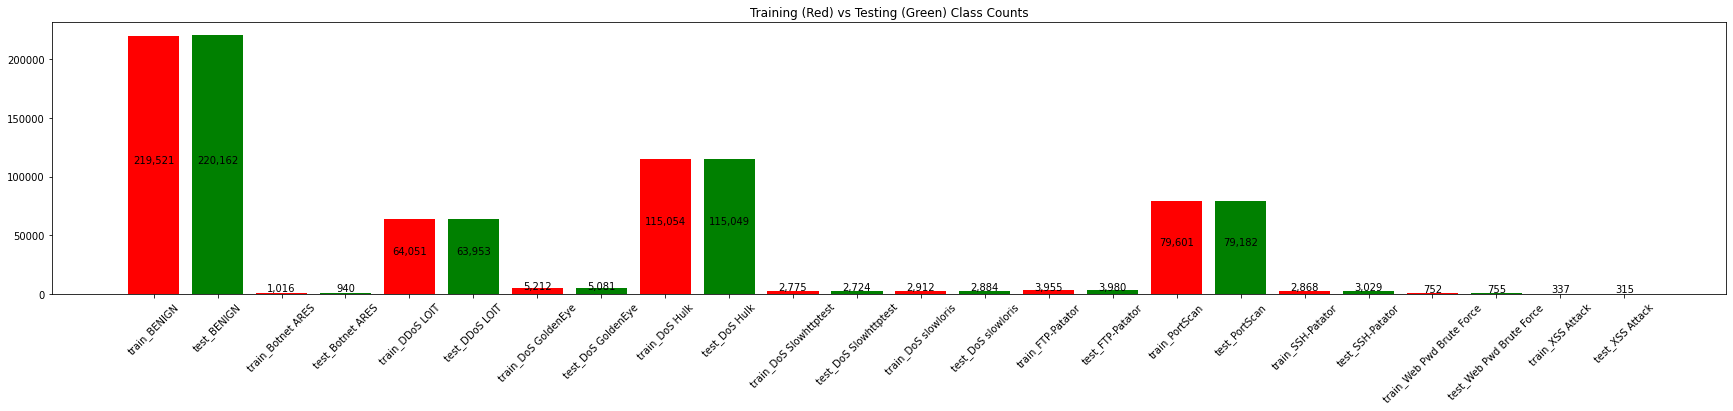

In [ ]:
# Visualize the table from the previous cell
plt.figure(figsize=(30, 5))
plt.title("Training (Red) vs Testing (Green) Class Counts")
auto_label(plt.bar(bar_names, bar_values, color=bar_colors))
plt.xticks(rotation=45)
print()

In [ ]:
df_copy.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
11347,80,5216127,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.766852,1738709.0,3010454.167,5214882,124,5216127,2608063.5,3686598.077,5214882,1245,0,0.0,0.0,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
11348,21,20,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,100000.000000,20.0,0.000,20,20,0,0.0,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,50000.000000,50000.000000,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,229,227,0,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
11349,21,38,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,52631.578950,38.0,0.000,38,38,0,0.0,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,26315.789470,26315.789470,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,229,227,0,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
11350,21,80,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,25000.000000,80.0,0.000,80,80,0,0.0,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,12500.000000,12500.000000,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,229,227,0,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator
11351,21,68,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,29411.764710,68.0,0.000,68,68,0,0.0,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,14705.882350,14705.882350,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,229,227,0,32,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator


### Your solution
Please write a small paragraph explaining what you did for your best approach:
> Write your answer here

How long does it take to train and test your model?
> Write your answer here

What is the **Balanced Accuracy Score** of your model?
> Write your answer here

What things did you try that didn't really work?
> Write your answer here

**Suggestions**
1. There are **78 features** per example in the dataset. Perhaps not all of them are important for this task? Could there possibly be a way to lower the number of features to train the model faster at the cost of a bit of accuracy while maintaining important information? Or perhaps there is a way to determine which features are more important from the dataset?
2. You can try to add more features to try and improve accuracy (hint: k-means)
3. A quick way to print all the important metrics for classification with one line of code is using sklearn's [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). The **Balanced Accuracy Score** is included in the report as "macro avg. recall". Seeing the whole report with all the metrics might give you better information about your model performance than just the Balanced Accuracy Score on its own. Also, be sure to add "target_names=class_names" as a parameter to get a better report!
4. Remember, some models really need you to **perform some data preprocessing** in order to work properly
5. There is an imbalance between the classes. We have discussed some approaches to these types of problems before. Perhaps combining **multiple models** might be better than having just one model.
6. Since some classes are similar, what if you **combined similar classes into one category**? Is it that important to know which type of DoS attack it is, or just to know that it is a DoS attack in general?
7. There are two extra variables provided to you that might be very useful for visualization, **class_names** and **feature_names**. **Some sk-learn methods take these as parameters**, so be on the look-out for them.
8. Since you want to try many different values for parameters, consider using what you learned about parameter selection through **Grid Search**. Remember to set the parameter **scoring='balanced_accuracy'** to search parameters that maximize the Balanced Accuracy Score!

Although I offer some suggestions of things to try I do not know what the best model or parameters are for this task, so have fun and try out anything that comes to your mind! Don't limit yourself by my suggestions!

Please write your code here. Feel free to add more cells!

In [ ]:
# YOUR CODE GOES HERE

In [ ]:
# YOUR CODE GOES HERE

## Part 2: Ensembles
1. [Fill-In-Blank] Ensembles are groups of <_ _ _ _> or <_ _ _ _ >
> Your answer here

2. Suppose there are 8 models in an ensemble of binary classifiers and the accuracies are given by the following array [0.9, 0.85, 0.82, 0.83, 0.75, 0.78, 0.8, 0.82]. What is the accuracy of the ensemble using simple voting? 
> Your answer here

3. [True/False] Suppose we are classifying 10 classes, the probability of getting the correct class by guessing randomly is 10%. If all members of an ensemble perform better than random guessing and errors made by individual members **are strongly correlated**, ensembles would work well for this classification problem.
> Your answer here

4. There were five ways described in this class to build an ensemble. Name all of them.
> Your answer here

5. [True/False] In boosting methods, models are built sequentially and each subsequent model tries to reduce the error of the previous one, thereby combining several weak models into one strong ensemble model.
> Your answer here

6. Another ensemble method is called bagging. What is bagging and how does it differ from boosting?
> Your answer here 

7. [Fill-In-Blank] We covered two ensemble models that use a method called Algorithm Randomization. Those models are <_ _ _ _> and <_ _ _ _ > and are included in sk-learn. They are also my personal favorites from all the algorithms we have covered so far, they are faster to build compared to other ensemble methods, and it's easier to obtain <_ _ _ _ _> outputs using them.
> Your answer here

8. Use a **RandomForestClassifier** to classify the doh dataset. Be sure to set **max_depth** and **n_estimators** to a reasonable number so it doesn't get stuck training for a really long time.

In [ ]:
# Your code goes here

## Part 3: Support Vector Machines

1. [True/False] SVMs became popular because they achieved great success compared to other algorithms of their time in handwritten digit recognition and they used to be one of the most widely used algorithms before the deep learning renaissance.
> Your answer here

2. What is a support vector?
> Your answer here

3. We covered some mathematical and geometrical details about how SVMs work. However, please tell us what you understand about what SVMs are in your own words. 
> Your answer here

4. When might we want to use SVMs instead of the other models we have covered previously?
> Your answer here

5. [Fill-In-Blank] A key idea of SVMs is to transform inputs to a higher dimensional space which we call the "feature space". However, computations in this space can be costly because the feature space is high dimensional. That's where the < _ _ _ _> comes into play.
> Your answer here

6. List the names of some commonly used kernel functions in SVMs. You don't have to go into detail on what they are mathematically or explain them, just name them.
> Your answer here

7. In the presentation and exercise we mention a parameter named **C** and a parameter which is used to set the kernel function we want to use. What is the value of **C** used for?
> Your answer here

8. [True/False] There are two key concepts of SVMs. **Minimizing** the margin, and the kernel trick.
> Your answer here

9. Find 'good' values of C and gamma to classify the doh dataset using an RBF SVC.

In [ ]:
# Your code goes here

## Part 4: Data Pre-Processing

1. [Fill-In-Blank] We want to do data pre-processing when features have very different <_ _ _ _>, are <_ _ _ _>, or may be redundant.
> Your answer here

2. [True/False] Min-Max Scaling is fast, simple, and insensitive to outliers.
> Your answer here

3. [Fill-In-Blank] Standardization (z-scaling) scales every feature to have <_ _ _ _> and <_ _ _ _>. It is simple but tends to produce good model performance and is sensitive to outliers but not as much as Min-Max Scaling.
> Your answer here

4. Normalization is another simple feature scaling approach but is application dependent. Define what normalization is and one scenario where we might use it.
> Your answer here

5. [True/False] If our features are non-numeric, we can use one-hot encoding to convert them into a numeric representation that can be used in machine learning models.
> Your answer here

6. Suppose your input data contains the names of different days of the week and you want to include them in your machine learning model. What is the one-hot encoding representation of Thursday? Assume the indices are in order starting from Monday and ending in Sunday.
> Your answer here

7. When is one-hot encoding not practical?
> Your answer here

8. Explain what Principal Component Analysis (PCA) is in your own words and why we might use it.
> Your answer here

9. [True/False] The explained variance ratio is the percentage of variance that is attributed by each of the principal components and it can be used to estimate how much information is retained or lost through PCA.
> Your answer here

10. Compare **StandardScaler**, **Normalizer**, and **MinMaxScaler** to classify the doh dataset with **decision trees**.


In [ ]:
# Your code goes here

11. Determine the accuracy of decision trees with the doh dataset using **PCA preprocessing** mainting the following fractions of the information: [0.5, 0.8, 0.9,0.95, 0.99, 0.995, 0.999].

In [ ]:
# Your code goes here

12. Use **one-hot encoding** to include one of the categorical features in the doh dataset and classify it using a **decision tree**.

In [ ]:
# Your code goes here

## Part 5: K-Means Clustering

1. [True/False] K-Means is an unsupervised machine learning algorithm.
> Your answer here

2. [True/False] The value of K in K-Means is computed by applying PCA to the dataset, finding how many components are needed to represent 95% of the data, and taking that number of components as the K.
> Your answer here

3. What does the **K** in k-means represent?
> Your answer here

4. How could we integrate k-means into a supervised model?
> Your answer here

5. [Fill-In-Blank] The k-means algorithm uses <_ _ _ _> distance as the metric when evaluating the distance of the data to the cluster centers.
> Your answer here

6. To evaluate and analyze a cluster we can look at two metrics, inter-cluster similarity and intra-cluster similarity. Describe in simple words the difference between them.
> Your answer here

7. Classify the MNIST dataset using the transformation to the cluster-distance space with **k-means**. You may choose any value of K and any supervised model you would like for this problem.

In [ ]:
# Your code goes here
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

## Part 6: Feature Selection, Creation, and Parameter Selection

1. [Fill-In-Blank] There are two main types of approaches for feature selection, <_ _ _ _> where features are selected independently of the classification algorithm to be used and <_ _ _ _> where features are selected to target a specific classification algorithm.
> Your answer here

2. [True/False] In general, wrapper approaches perform slightly better but you must be careful not to overfit the data.
> Your answer here

3. Write code that implements the incremental feature selection approach using the doh dataset.

In [ ]:
# YOUR CODE GOES HERE

4. Random Forest classifiers can be used to compute feature importances. These in turn can be used to perform a more sophisticated feature selection. Write the code needed to train a Random Forest classifier using the doh dataset, extract the feature importances from the classifier, and print them sorted with the most important features at the top. Remember, **feature_names=df.columns**

In [ ]:
# YOUR CODE GOES HERE

5. You can perform exhaustive searching of parameters for an algorithm that maximize a specific evaluation using **Grid Search** which has an implementation in sk-learn. Use the grid search algorithm to find the best **max_depth** and **n_estimators** needed to gain the highest **Balanced Accuracy Score** in the **MNIST** dataset. As a hint, the parameter **scoring** should be set to **'balanced_accuracy'**.

In [ ]:
# YOUR CODE GOES HERE